Predictions and simulations project

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as sm

In [2]:
df = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

In [3]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
df.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

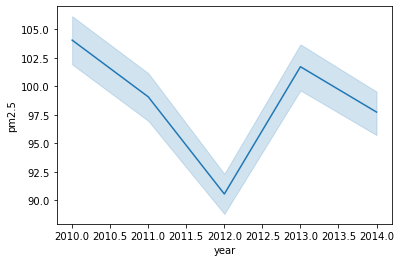

In [5]:
dfplot = sns.lineplot(x = 'year', y = 'pm2.5', data = df)

In [6]:
datetime = df[['year', 'month', 'day', 'hour']]
datetime

,year,month,day,hour
0,2010,1,1,0
1,2010,1,1,1
2,2010,1,1,2
3,2010,1,1,3
4,2010,1,1,4
...,...,...,...,...
43819,2014,12,31,19
43820,2014,12,31,20
43821,2014,12,31,21
43822,2014,12,31,22


In [7]:
df['Datetime'] = pd.to_datetime(datetime)

In [8]:
df.head()
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Datetime
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,2014-12-31 19:00:00
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,2014-12-31 20:00:00
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,2014-12-31 21:00:00
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,2014-12-31 22:00:00


In [9]:
df.index = df['Datetime']
del df['Datetime']
del df['No']
df2 = df.dropna()
df2.sort_index(inplace=True)

43824 - 41757 = 2067 Na's went delet

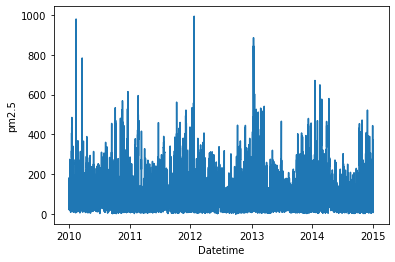

In [10]:
dfplot = sns.lineplot(x = 'Datetime', y = 'pm2.5', data = df2)

In [11]:
df2['Trend'] = range(1,len(df2)+1)

<ipython-input-11-34a127a3adb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Trend'] = range(1,len(df2)+1)


In [12]:
df2.rename(columns={'pm2.5':'pm25'}, inplace= True)

c:\Users\mi.martowicz\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [13]:
df2

,year,month,day,hour,pm25,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Trend
Datetime,,,,,,,,,,,,,
2010-01-02 00:00:00,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,1
2010-01-02 01:00:00,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2
2010-01-02 02:00:00,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,3
2010-01-02 03:00:00,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,4
2010-01-02 04:00:00,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,41753
2014-12-31 20:00:00,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,41754
2014-12-31 21:00:00,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,41755


In [14]:
df2_in = df2[df2.index < "2014-01-01"]

In [15]:
model = sm.ols(formula="pm25 ~ Trend + C(month) + C(day) + C(hour)", data=df2_in)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pm25   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     25.41
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          4.59e-294
Time:                        21:27:57   Log-Likelihood:            -1.9568e+05
No. Observations:               33096   AIC:                         3.915e+05
Df Residuals:                   33030   BIC:                         3.921e+05
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        121.1949      4.072     29.762      0.000     113.214     129.176
C(month)[T.2]      0.2130      2.436      0.087      0.930      -4.563       4.989
C(month)[T.3]    -18.3627      2.408     -7.627      0.000     -23.082     -13.644
C(month)[T.4]    -32.3895      2.439    -13.281      0.000     -37.170     -27.610
C(month)[T.5]    -30.5813      2.398    -12.753      0.000     -35.281     -25.881
C(month)[T.6]     -6.7907      2.442     -2.781      0.005     -11.577      -2.004
C(month)[T.7]    -17.2392      2.394     -7.201      0.000     -21.932     -12.547
C(month)[T.8]    -27.9546      2.466    -11.334      0.000     -32.789     -23.120
C(month)[T.9]    -22.8363      2.476     -9.221      0.000     -27.690     -17.982
C(month)[T.10]     2.4008      2.422      0.991      0.322      -2.347       7.148
C(month)[T.11]    -6.5557      2.439     -2.688      0.007     -11.337      -1.775
C(month)[T.12]    -9.0771      2.431     -3.733      0.000     -13.843      -4.311
C(day)[T.2]       -5.4880      3.874     -1.417      0.157     -13.081       2.105
C(day)[T.3]       -6.9628      3.856     -1.806      0.071     -14.521       0.595
C(day)[T.4]       -4.4226      3.855     -1.147      0.251     -11.978       3.133
C(day)[T.5]        7.1641      3.857      1.857      0.063      -0.396      14.725
C(day)[T.6]       12.0557      3.896      3.094      0.002       4.419      19.692
C(day)[T.7]       12.9952      3.885      3.345      0.001       5.380      20.610
C(day)[T.8]        7.3498      3.867      1.901      0.057      -0.230      14.930
C(day)[T.9]       11.4613      3.862      2.967      0.003       3.891      19.032
C(day)[T.10]     -12.6242      3.848     -3.281      0.001     -20.166      -5.082
C(day)[T.11]      -8.6136      3.839     -2.244      0.025     -16.139      -1.088
C(day)[T.12]       4.2583      3.842      1.108      0.268      -3.271      11.788
C(day)[T.13]      11.5539      3.832      3.015      0.003       4.043      19.064
C(day)[T.14]     -11.5331      3.861     -2.987      0.003     -19.100      -3.966
C(day)[T.15]       5.3354      3.880      1.375      0.169      -2.269      12.940
C(day)[T.16]      10.0488      3.870      2.596      0.009       2.463      17.634
C(day)[T.17]       8.2112      3.841      2.138      0.033       0.683      15.739
C(day)[T.18]      26.3935      3.856      6.844      0.000      18.835      33.952
C(day)[T.19]      27.8183      3.871      7.187      0.000      20.231      35.405
C(day)[T.20]      26.2347      3.903      6.722      0.000      18.586      33.884
C(day)[T.21]      35.7515      3.882      9.209      0.000      28.142      43.361
C(day)[T.22]      26.1555      3.886      6.730      0.000      18.538      33.773
C(day)[T.23]      25.2195      3.901      6.464      0.000      17.572      32.866
C(day)[T.24]

In [16]:
df2['pm25_OLS'] = results.predict(df2)

<ipython-input-16-5e3218c0311a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['pm25_OLS'] = results.predict(df2)


In [17]:
df2

,year,month,day,hour,pm25,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Trend,pm25_OLS
Datetime,,,,,,,,,,,,,,
2010-01-02 00:00:00,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,1,115.706762
2010-01-02 01:00:00,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2,116.080278
2010-01-02 02:00:00,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,3,112.020310
2010-01-02 03:00:00,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,4,109.539495
2010-01-02 04:00:00,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,5,105.375696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,41753,95.994883
2014-12-31 20:00:00,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,41754,103.188514
2014-12-31 21:00:00,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,41755,108.212459


<AxesSubplot:xlabel='Datetime'>

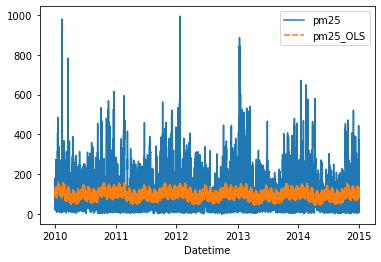

In [18]:
dfplot2 = df2.filter(['pm25', 'pm25_OLS'])#[(df2.index >= '2014-12-25') & (df2.index <= '2015-01-01')]
sns.lineplot(data=dfplot2)